In [1]:
import pandas as pd

df = pd.read_csv("posts.csv")

In [2]:
df.shape

(10477, 9)

In [3]:
df.head()

,S.No,Title,URL,Score,Created_At,Num_Comments,Top_Comments,Subreddit,Post_ID
0,1,"Priorities, after all...",https://i.redd.it/qm0pwyesy0k61.jpg,526,2021-02-28 15:45:22,31,"Uh, we don't have a supermajority, so we can't...",PoliticalHumour,lucill
1,2,Cruz is an idiot but it’s kinda true,https://i.redd.it/yersecguiei61.jpg,675,2021-02-19 14:45:53,41,"Cruz is an idiot, he said that the problem was...",PoliticalHumour,lnbm7n
2,3,The Onion yet again saying the quiet part out ...,https://i.redd.it/3pevv4rdhm7b1.jpg,130,2023-06-23 11:55:39,3,https://www.theonion.com/critics-say-submersib...,PoliticalHumour,14gqvgg
3,4,Snopes “fact checks” Christian satire site Bab...,https://www.ncll.org/news-alerts/snopes-fact-c...,8,2023-06-23 11:36:31,8,Snopes ate the onion and agrees it tasted onio...,PoliticalHumour,14gqjf8
4,5,How to start a movement | Derek Sivers,https://youtube.com/watch?v=V74AxCqOTvg&featur...,2,2023-06-23 05:56:20,0,NaN,PoliticalHumour,14gjswy


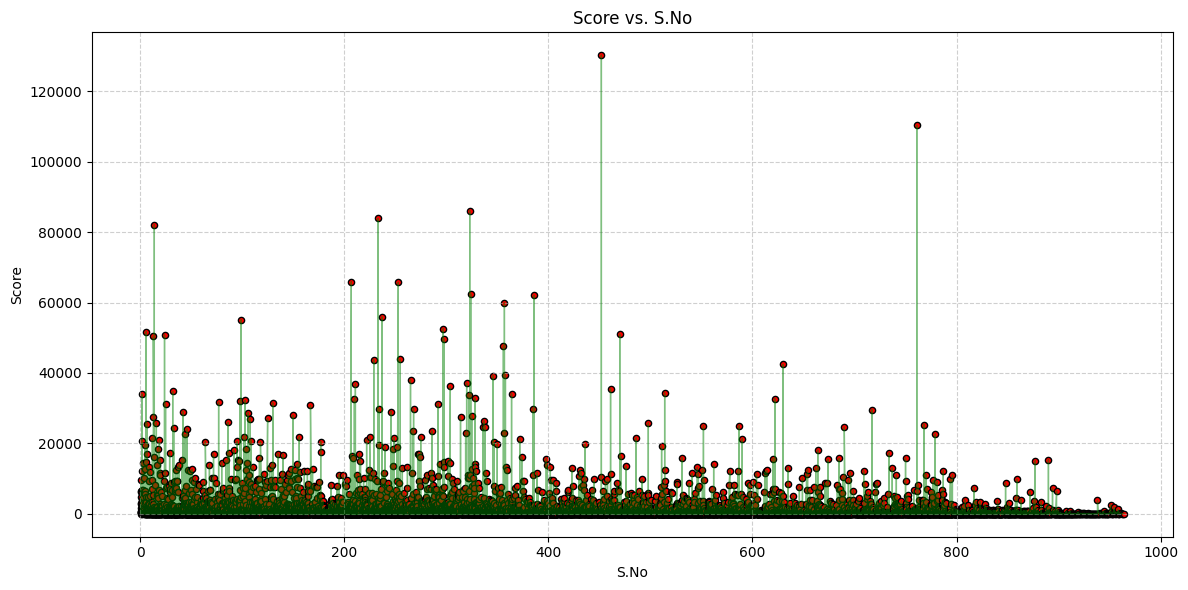

In [4]:
import matplotlib.pyplot as plt

# Sort dataframe by 'S.No' for a smoother line
df_sorted = df.sort_values(by="S.No")


plt.figure(figsize=[12, 6])

# Use a scatter plot for individual points and a line to connect them
plt.plot(df_sorted["S.No"], df_sorted["Score"], color='green', alpha=0.5, linestyle='-', linewidth=1)
plt.scatter(df_sorted["S.No"], df_sorted["Score"], color='red', edgecolors='black', s=20)

plt.xlabel("S.No")
plt.ylabel("Score")
plt.title("Score vs. S.No")
plt.grid(True, linestyle='--', alpha=0.6)  # Use dashed lines for a subtle grid
plt.tight_layout()

plt.show()

In [5]:
# Define valid image extensions
image_extensions = ('.jpg', '.jpeg', '.png')

# Keep only rows where "URL" ends with valid image extensions
df = df[df["URL"].str.endswith(image_extensions, na=False)].copy()

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Print the new DataFrame shape
print(f"Remaining rows after filtering: {df.shape[0]}")


Remaining rows after filtering: 9399


In [6]:
df.shape

(9399, 9)

In [7]:
# Compute quantiles for each subreddit
quantiles = df.groupby('Subreddit')['Score'].quantile([0.05, 0.95]).unstack()

# Merge quantiles back to the original dataframe
df = df.merge(quantiles, on='Subreddit', suffixes=('', '_quantile'))

# Filter the dataset
df = df[(df['Score'] >= df[0.95]) | (df['Score'] <= df[0.05])]

# Create the "Viral" column
df['Viral'] = (df['Score'] >= df[0.95]).astype(int)

# Drop unnecessary columns
df = df.drop(columns=[0.05, 0.95])

In [8]:
df.shape

(1180, 10)

In [9]:
df.head()

,S.No,Title,URL,Score,Created_At,Num_Comments,Top_Comments,Subreddit,Post_ID,Viral
0,1,"Priorities, after all...",https://i.redd.it/qm0pwyesy0k61.jpg,526,2021-02-28 15:45:22,31,"Uh, we don't have a supermajority, so we can't...",PoliticalHumour,lucill,1
1,2,Cruz is an idiot but it’s kinda true,https://i.redd.it/yersecguiei61.jpg,675,2021-02-19 14:45:53,41,"Cruz is an idiot, he said that the problem was...",PoliticalHumour,lnbm7n,1
2,3,The Onion yet again saying the quiet part out ...,https://i.redd.it/3pevv4rdhm7b1.jpg,130,2023-06-23 11:55:39,3,https://www.theonion.com/critics-say-submersib...,PoliticalHumour,14gqvgg,1
8,16,Made me spit my coffee out.,https://i.redd.it/6svaangytt5b1.jpg,67,2023-06-13 23:45:18,9,u/islandinthecold\r \n\n\nlol ;)|Well well we...,PoliticalHumour,148ltuu,1
34,52,"Live footage of Biden defenders ""holding his f...",https://i.redd.it/ip6i4rdctu0b1.jpg,0,2023-05-20 01:23:25,4,"Biden is old Captain America? I like Biden, ...",PoliticalHumour,13m5xi2,0


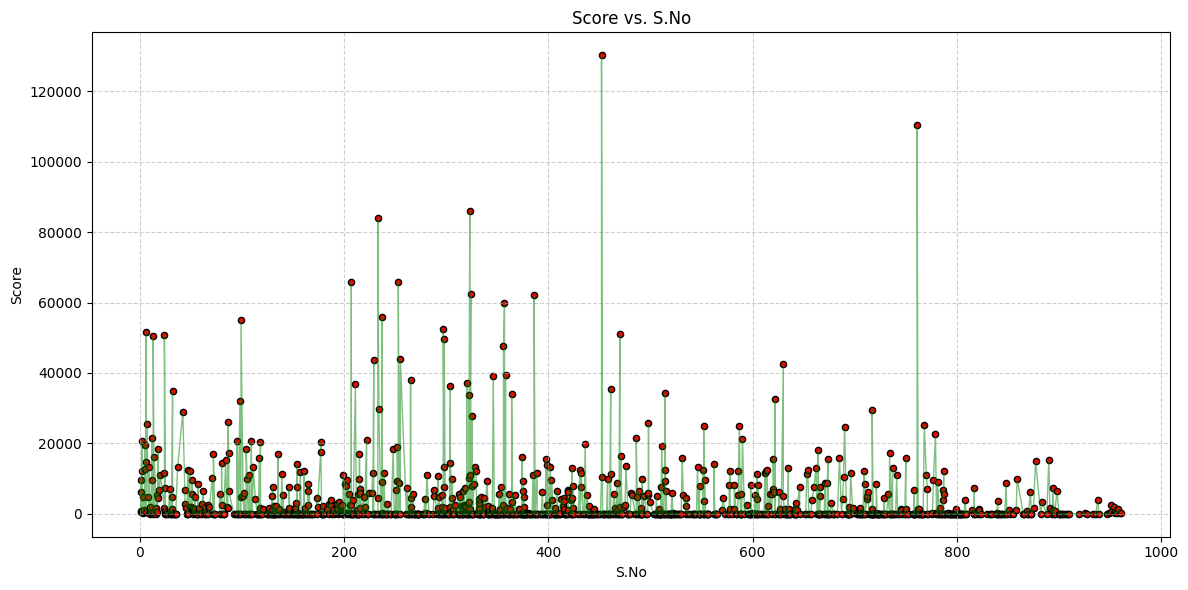

In [10]:
# Sort dataframe by 'S.No' for a smoother line
df_sorted = df.sort_values(by="S.No")


plt.figure(figsize=[12, 6])

# Use a scatter plot for individual points and a line to connect them
plt.plot(df_sorted["S.No"], df_sorted["Score"], color='green', alpha=0.5, linestyle='-', linewidth=1)
plt.scatter(df_sorted["S.No"], df_sorted["Score"], color='red', edgecolors='black', s=20)

plt.xlabel("S.No")
plt.ylabel("Score")
plt.title("Score vs. S.No")
plt.grid(True, linestyle='--', alpha=0.6)  # Use dashed lines for a subtle grid
plt.tight_layout()

plt.show()

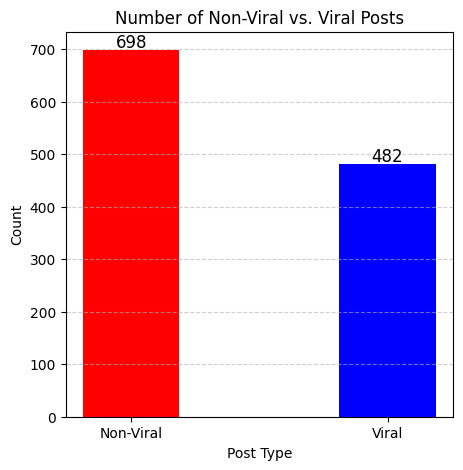

In [11]:
# Count the number of viral (1) and non-viral (0) posts
viral_counts = df["Viral"].value_counts()

# Define x positions to keep bars closer together
x_positions = [0, 0.8]  

plt.figure(figsize=(5, 5))
plt.bar(x_positions, viral_counts.values, color=['red', 'blue'], width=0.3)

# Adjust x-ticks to match new positions
plt.xticks(x_positions, ["Non-Viral", "Viral"])  
plt.xlabel("Post Type")
plt.ylabel("Count")
plt.title("Number of Non-Viral vs. Viral Posts")
plt.grid(axis='y', linestyle="--", alpha=0.6)

# Show values on top of bars
for x, count in zip(x_positions, viral_counts.values):
    plt.text(x, count + 5, str(count), ha='center', fontsize=12)

plt.show()

In [12]:
import praw
import requests
from io import BytesIO
from PIL import Image
import cv2
import numpy as np
from collections import Counter
from webcolors import rgb_to_name, hex_to_rgb

# Manually defined CSS3 color names and hex codes
CSS3_NAMES_TO_HEX = {
    'black': '#000000', 'silver': '#c0c0c0', 'gray': '#808080', 'white': '#ffffff',
    'maroon': '#800000', 'red': '#ff0000', 'purple': '#800080', 'fuchsia': '#ff00ff',
    'green': '#008000', 'lime': '#00ff00', 'olive': '#808000', 'yellow': '#ffff00',
    'navy': '#000080', 'blue': '#0000ff', 'teal': '#008080', 'aqua': '#00ffff',
    'orange': '#ffa500', 'aliceblue': '#f0f8ff', 'antiquewhite': '#faebd7',
    'aquamarine': '#7fffd4', 'azure': '#f0ffff', 'beige': '#f5f5dc', 'bisque': '#ffe4c4',
    'blanchedalmond': '#ffebcd', 'blueviolet': '#8a2be2', 'brown': '#a52a2a',
    'burlywood': '#deb887', 'cadetblue': '#5f9ea0', 'chartreuse': '#7fff00',
    'chocolate': '#d2691e', 'coral': '#ff7f50', 'cornflowerblue': '#6495ed',
    'cornsilk': '#fff8dc', 'crimson': '#dc143c', 'cyan': '#00ffff', 'darkblue': '#00008b',
    'darkcyan': '#008b8b', 'darkgoldenrod': '#b8860b', 'darkgray': '#a9a9a9',
    'darkgreen': '#006400', 'darkgrey': '#a9a9a9', 'darkkhaki': '#bdb76b',
    'darkmagenta': '#8b008b', 'darkolivegreen': '#556b2f', 'darkorange': '#ff8c00',
    'darkorchid': '#9932cc', 'darkred': '#8b0000', 'darksalmon': '#e9967a',
    'darkseagreen': '#8fbc8f', 'darkslateblue': '#483d8b', 'darkslategray': '#2f4f4f',
    'darkslategrey': '#2f4f4f', 'darkturquoise': '#00ced1', 'darkviolet': '#9400d3',
    'deeppink': '#ff1493', 'deepskyblue': '#00bfff', 'dimgray': '#696969',
    'dimgrey': '#696969', 'dodgerblue': '#1e90ff', 'firebrick': '#b22222',
    'floralwhite': '#fffaf0', 'forestgreen': '#228b22', 'gainsboro': '#dcdcdc',
    'ghostwhite': '#f8f8ff', 'gold': '#ffd700', 'goldenrod': '#daa520', 'greenyellow': '#adff2f',
    'grey': '#808080', 'honeydew': '#f0fff0', 'hotpink': '#ff69b4', 'indianred': '#cd5c5c',
    'indigo': '#4b0082', 'ivory': '#fffff0', 'khaki': '#f0e68c', 'lavender': '#e6e6fa',
    'lavenderblush': '#fff0f5', 'lawngreen': '#7cfc00', 'lemonchiffon': '#fffacd',
    'lightblue': '#add8e6', 'lightcoral': '#f08080', 'lightcyan': '#e0ffff',
    'lightgoldenrodyellow': '#fafad2', 'lightgray': '#d3d3d3', 'lightgreen': '#90ee90',
    'lightgrey': '#d3d3d3', 'lightpink': '#ffb6c1', 'lightsalmon': '#ffa07a',
    'lightseagreen': '#20b2aa', 'lightskyblue': '#87cefa', 'lightslategray': '#778899',
    'lightslategrey': '#778899', 'lightsteelblue': '#b0c4de', 'lightyellow': '#ffffe0',
    'limegreen': '#32cd32', 'linen': '#faf0e6', 'mediumaquamarine': '#66cdaa',
    'mediumblue': '#0000cd', 'mediumorchid': '#ba55d3', 'mediumpurple': '#9370db',
    'mediumseagreen': '#3cb371', 'mediumslateblue': '#7b68ee', 'mediumspringgreen': '#00fa9a',
    'mediumturquoise': '#48d1cc', 'mediumvioletred': '#c71585', 'midnightblue': '#191970',
    'mintcream': '#f5fffa', 'mistyrose': '#ffe4e1', 'moccasin': '#ffe4b5',
    'navajowhite': '#ffdead', 'oldlace': '#fdf5e6', 'olivedrab': '#6b8e23',
    'orangered': '#ff4500', 'orchid': '#da70d6', 'palegoldenrod': '#eee8aa',
    'palegreen': '#98fb98', 'paleturquoise': '#afeeee', 'palevioletred': '#db7093',
    'papayawhip': '#ffefd5', 'peachpuff': '#ffdab9', 'peru': '#cd853f',
    'pink': '#ffc0cb', 'plum': '#dda0dd', 'powderblue': '#b0e0e6', 'rosybrown': '#bc8f8f',
    'royalblue': '#4169e1', 'saddlebrown': '#8b4513', 'salmon': '#fa8072',
    'sandybrown': '#f4a460', 'seagreen': '#2e8b57', 'seashell': '#fff5ee',
    'sienna': '#a0522d', 'skyblue': '#87ceeb', 'slateblue': '#6a5acd',
    'slategray': '#708090', 'slategrey': '#708090', 'snow': '#fffafa',
    'springgreen': '#00ff7f', 'steelblue': '#4682b4', 'tan': '#d2b48c',
    'thistle': '#d8bfd8', 'tomato': '#ff6347', 'turquoise': '#40e0d0',
    'violet': '#ee82ee', 'wheat': '#f5deb3', 'whitesmoke': '#f5f5f5',
    'yellowgreen': '#9acd32'
}

# Reddit API setup (fill in your credentials)
reddit = praw.Reddit(
    client_id='nCJNw28iSSVNv5AkE1riTw',
    client_secret='LFXHQYI2i1nW3LRXiihP7OXxSFpgvQ',
    user_agent=True,
    username="BootDiscombobulated4", 
    password="thisaccountisonlyforfb365247"
)

# Function to get dominant color
def get_dominant_color(image):
    image = image.resize((50, 50))  # Resize for faster processing
    pixels = np.array(image).reshape((-1, 3))
    most_common = Counter(map(tuple, pixels)).most_common(1)[0][0]
    return most_common

# Function to convert RGB to color name
def get_color_name(rgb_color):
    try:
        return rgb_to_name(rgb_color)
    except ValueError:
        min_colors = {}
        for name, hex_code in CSS3_NAMES_TO_HEX.items():
            r_c, g_c, b_c = hex_to_rgb(hex_code)
            rd = (r_c - rgb_color[0]) ** 2
            gd = (g_c - rgb_color[1]) ** 2
            bd = (b_c - rgb_color[2]) ** 2
            min_colors[(rd + gd + bd)] = name
        return min_colors[min(min_colors.keys())]

# Function to extract image features
def extract_image_features(url):
    try:
        response = requests.get(url)
        image = Image.open(BytesIO(response.content)).convert('RGB')
        img_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

        # Thumbnail dimensions
        thumbnail_width, thumbnail_height = image.size

        # Dominant color
        dominant_color = get_dominant_color(image)
        dominant_color_name = get_color_name(dominant_color)
        hex_color = '#%02x%02x%02x' % dominant_color

        # HSV and average color values
        hsv_img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)
        avg_hue = round(np.mean(hsv_img[:, :, 0]), 2)
        avg_saturation = round(np.mean(hsv_img[:, :, 1]), 2)
        avg_value = round(np.mean(hsv_img[:, :, 2]), 2)

        avg_red = round(np.mean(img_cv[:, :, 2]), 2)
        avg_green = round(np.mean(img_cv[:, :, 1]), 2)
        avg_blue = round(np.mean(img_cv[:, :, 0]), 2)

        return pd.Series([
            thumbnail_height,
            thumbnail_width,
            f'RGB{dominant_color}',
            dominant_color_name,
            avg_hue,
            avg_saturation,
            avg_value,
            avg_red,
            avg_green,
            avg_blue,
            hex_color
        ])
    except Exception as e:
        print(f"Error processing image {url}: {e}")
        return pd.Series([None]*11)

# Apply image feature extraction
df[['Thumbnail_Height', 'Thumbnail_Width', 'Top_Color', 'Top_Color_Name',
    'Average_Hue', 'Average_Saturation', 'Average_Value',
    'Average_Red', 'Average_Green', 'Average_Blue', 'Hex_Color']] = df['URL'].apply(extract_image_features)


/var/folders/ch/88j3sv7j0wn5hmc4mrx8cfkw0000gp/T/ipykernel_10161/3737939203.py:84: RuntimeWarning: overflow encountered in scalar subtract
  rd = (r_c - rgb_color[0]) ** 2
/var/folders/ch/88j3sv7j0wn5hmc4mrx8cfkw0000gp/T/ipykernel_10161/3737939203.py:85: RuntimeWarning: overflow encountered in scalar subtract
  gd = (g_c - rgb_color[1]) ** 2
/var/folders/ch/88j3sv7j0wn5hmc4mrx8cfkw0000gp/T/ipykernel_10161/3737939203.py:86: RuntimeWarning: overflow encountered in scalar subtract
  bd = (b_c - rgb_color[2]) ** 2
/var/folders/ch/88j3sv7j0wn5hmc4mrx8cfkw0000gp/T/ipykernel_10161/3737939203.py:87: RuntimeWarning: overflow encountered in scalar add
  min_colors[(rd + gd + bd)] = name


Error processing image https://i.imgur.com/GUvN3vI.jpg: cannot identify image file <_io.BytesIO object at 0x11dceb9c0>
Error processing image https://i.imgur.com/5Ab68DC.png: cannot identify image file <_io.BytesIO object at 0x12f3ba2f0>
Error processing image https://i.imgur.com/y21DN03.jpg: cannot identify image file <_io.BytesIO object at 0x12f3bb600>
Error processing image https://i.imgur.com/5dlsX2h.jpg: cannot identify image file <_io.BytesIO object at 0x12f3f8950>
Error processing image https://i.imgur.com/TljRtGq.jpg: cannot identify image file <_io.BytesIO object at 0x12f3f93a0>
Error processing image https://i.imgur.com/cxCDRyi.jpg: cannot identify image file <_io.BytesIO object at 0x12f3f95d0>
Error processing image https://i.imgur.com/COaz9RK.png: cannot identify image file <_io.BytesIO object at 0x12f3f9a30>
Error processing image https://i.imgur.com/fT0ONbC.png: cannot identify image file <_io.BytesIO object at 0x12f3f9ee0>
Error processing image https://i.imgur.com/KLSaG

In [13]:
df.shape

(1180, 21)

In [14]:
# Display the number of missing values in each column
print("Missing values before dropping:")
print(df.isnull().sum())

Missing values before dropping:
S.No                    0
Title                   0
URL                     0
Score                   0
Created_At              0
Num_Comments            0
Top_Comments          235
Subreddit               0
Post_ID                 0
Viral                   0
Thumbnail_Height       18
Thumbnail_Width        18
Top_Color              18
Top_Color_Name         18
Average_Hue            18
Average_Saturation     18
Average_Value          18
Average_Red            18
Average_Green          18
Average_Blue           18
Hex_Color              18
dtype: int64


In [15]:
# Fill missing or empty values in 'top comment' column with 'empty'
df['Top_Comments'] = df['Top_Comments'].fillna('empty')

# If some entries are empty strings instead of NaN, handle those too
df['Top_Comments'] = df['Top_Comments'].replace('', 'empty')


In [16]:
# Replace empty strings with NaN if needed
df.replace("", pd.NA, inplace=True)

In [17]:
df = df.dropna()
df.shape

(1162, 21)

In [18]:
from textblob import TextBlob

# Function to analyze sentiment for a single comment
def get_sentiment(text):
    # Convert non-string types to strings
    if pd.isna(text) or str(text).strip() == "":
        return 0  # Neutral for empty comments
    return TextBlob(str(text)).sentiment.polarity

# Function to split text into sentences and analyze sentiment for each sentence
def analyze_sentences_sentiment(text):
    sentences = str(text).split('.')  # Split text into sentences based on '.'
    sentiments = [get_sentiment(sentence) for sentence in sentences if sentence.strip() != '']
    return sentiments

# Function to count the number of positive, negative, and neutral comments
def count_sentiments(sentiments):
    positive_count = sum(1 for sentiment in sentiments if sentiment > 0.1)
    negative_count = sum(1 for sentiment in sentiments if sentiment < -0.1)
    neutral_count = sum(1 for sentiment in sentiments if -0.1 <= sentiment <= 0.1)
    return positive_count, negative_count, neutral_count

# Apply sentiment analysis to each row in the 'Top Comments' column
df['Sentiment_Sentences'] = df['Top_Comments'].apply(analyze_sentences_sentiment)

# Count the number of positive, negative, and neutral sentiments for each row
df[['Positive_Count', 'Negative_Count', 'Neutral_Count']] = df['Sentiment_Sentences'].apply(count_sentiments).apply(pd.Series)

# Categorize the overall sentiment (Average sentiment score)
df['Overall_Sentiment'] = df['Sentiment_Sentences'].apply(lambda sentiments: sum(sentiments) / len(sentiments) if sentiments else 0)

# Categorize the overall sentiment as Positive, Negative, or Neutral
def categorize_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['Overall_Sentiment_Label'] = df['Overall_Sentiment'].apply(categorize_sentiment)



In [19]:
# Function to analyze sentiment for a single post title
def analyze_post_title_sentiment(text):
    if pd.isna(text) or str(text).strip() == "":
        return 0  # Neutral for empty titles
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment analysis to the 'Post Title' column
df['Post_Title_Sentiment_Value'] = df['Title'].apply(analyze_post_title_sentiment)

# Categorize the sentiment of the post title
df['Post_Title_Sentiment'] = df['Post_Title_Sentiment_Value'].apply(categorize_sentiment)


[LightGBM] [Info] Number of positive: 376, number of negative: 553
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2147
[LightGBM] [Info] Number of data points in the train set: 929, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404736 -> initscore=-0.385769
[LightGBM] [Info] Start training from score -0.385769
Accuracy: 0.8069
Precision: 0.7573
Recall: 0.7959
F1 Score: 0.7761
ROC AUC Score: 0.8500


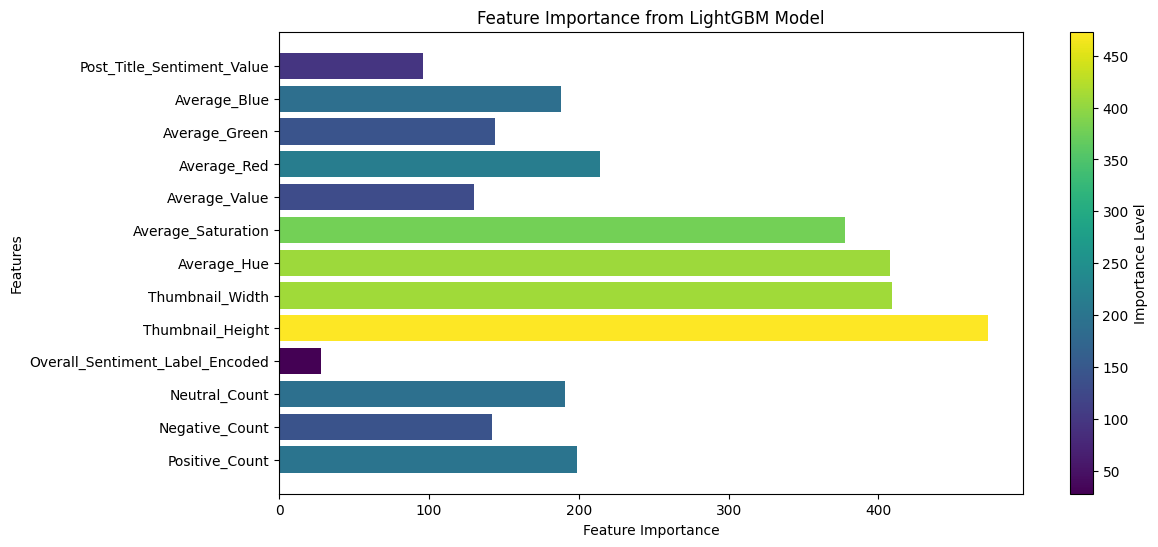

In [32]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels (e.g., Overall_Sentiment_Label) if necessary
label_encoder = LabelEncoder()
df['Overall_Sentiment_Label_Encoded'] = label_encoder.fit_transform(df['Overall_Sentiment_Label'])

# Select features
X = df[['Positive_Count', 'Negative_Count', 'Neutral_Count', 'Overall_Sentiment_Label_Encoded', 
        "Thumbnail_Height", "Thumbnail_Width", "Average_Hue",
        "Average_Saturation", "Average_Value", "Average_Red",
        "Average_Green", "Average_Blue", "Post_Title_Sentiment_Value"]]
y = df['Viral']  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LightGBM model
lgbm_model = lgb.LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=100)
lgbm_model.fit(X_train, y_train)

# Predict on test set
y_pred = lgbm_model.predict(X_test)
y_pred_prob = lgbm_model.predict_proba(X_test)[:, 1]  

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)  

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Feature Importances
importances = lgbm_model.feature_importances_
feature_names = X.columns

# Normalize importances for color mapping
normalized_importance = (importances - np.min(importances)) / (np.max(importances) - np.min(importances))
colors = plt.cm.viridis(normalized_importance)

# Plot feature importance
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(feature_names, importances, color=colors)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Features')
ax.set_title('Feature Importance from LightGBM Model')

# Add a color bar using ScalarMappable
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=np.min(importances), vmax=np.max(importances)))
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Importance Level")

# Show the plot
plt.show()


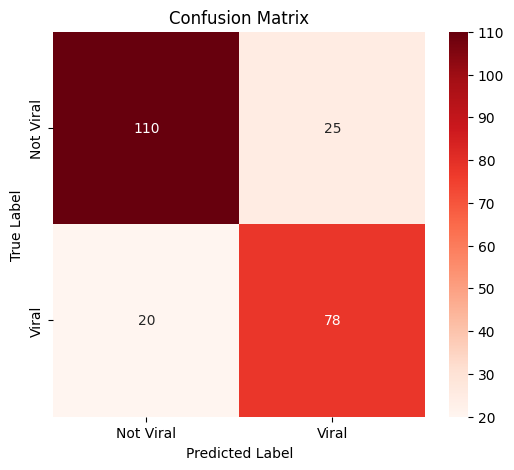

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Not Viral", "Viral"], yticklabels=["Not Viral", "Viral"])

# Labels, title, and formatting
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


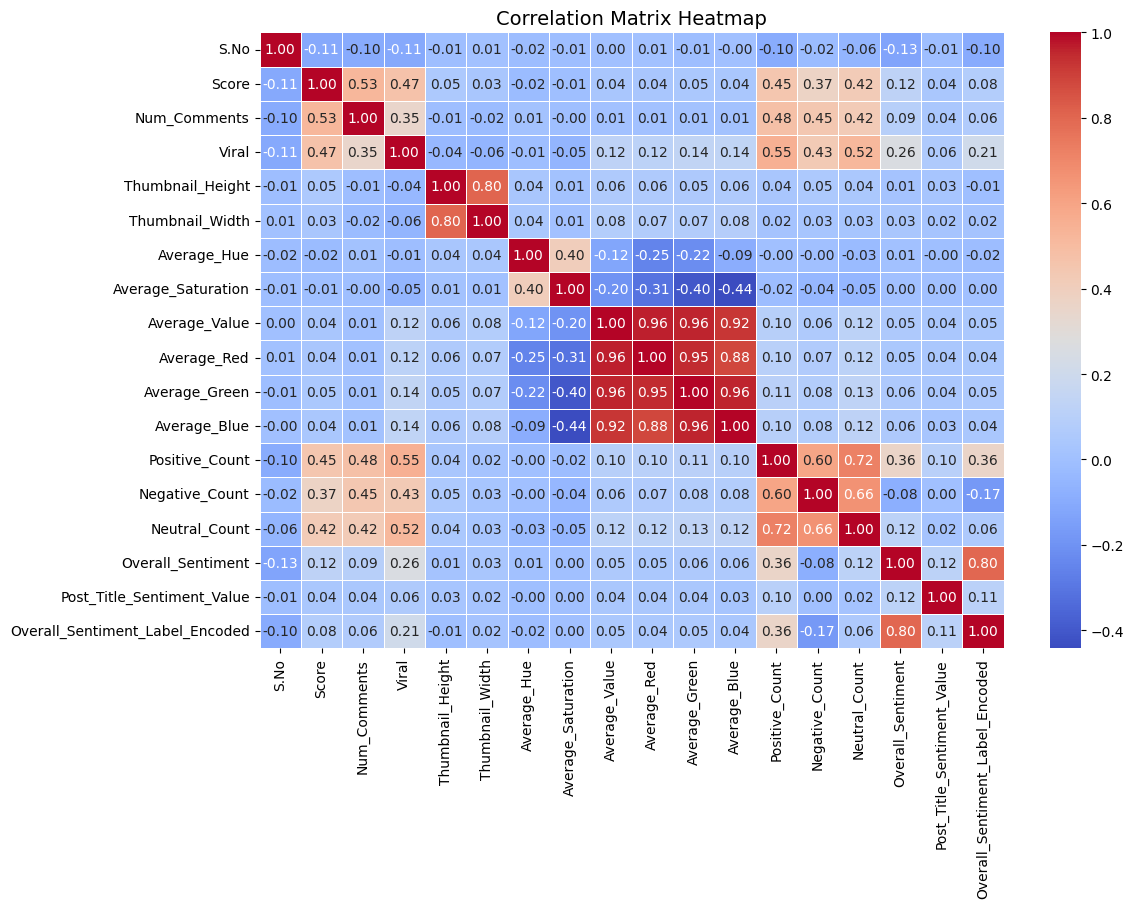

In [34]:

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])  # Excludes non-numeric columns

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title
plt.title("Correlation Matrix Heatmap", fontsize=14)

# Show plot
plt.show()

Confirmed ROC AUC Score: 0.8500


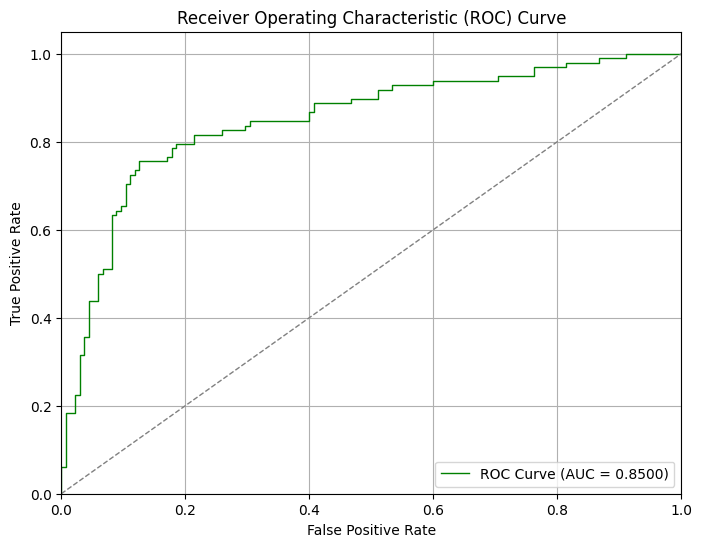

In [35]:
from sklearn.metrics import roc_curve, auc

# Ensure correct probability extraction
y_proba = lgbm_model.predict_proba(X_test)[:, 1]  

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)  
roc_auc = auc(fpr, tpr)  # Use the same method to calculate AUC

# Print AUC for confirmation
print(f"Confirmed ROC AUC Score: {roc_auc:.4f}")  

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=1, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)

# Show plot
plt.show()
